### Тема “Обучение без учителя”

##### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


C:\Users\artem\Documents\GB\4 Python Libs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaler = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочныx данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaler)

X_train_tsne[:5, :]

C:\Users\artem\Documents\GB\4 Python Libs\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 18.104149 ,  29.184141 ],
       [  3.3644612,  -7.9096684],
       [-20.716751 ,  -8.947255 ],
       [ 27.654587 ,  26.63646  ],
       [  4.3594193,  -7.4392295]], dtype=float32)

Постройте диаграмму рассеяния на этих данных.

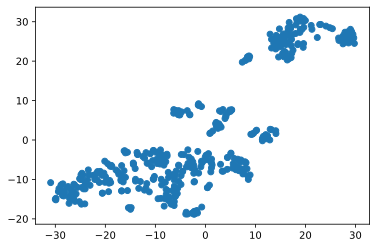

In [5]:
plt.style.use('fast')

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

##### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


In [6]:
from sklearn.cluster import KMeans

k_means_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

train_labels = k_means_model.fit_predict(X_train)

train_labels[:10]

array([1, 0, 0, 2, 0, 0, 0, 0, 2, 2])

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


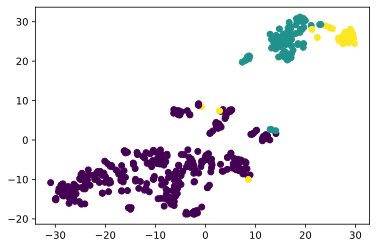

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [8]:
print('Кластер 0:\t CRIM: {},\tprice: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean(),\
                                                 y_train[train_labels == 0].mean()))
print('Кластер 1:\t CRIM: {},\tprice: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean(),\
                                                 y_train[train_labels == 1].mean()))
print('Кластер 2:\t CRIM: {},\tprice: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean(),\
                                                 y_train[train_labels == 2].mean()))

Кластер 0:	 CRIM: 0.40486282828282827,	price: 25.16868686868687
Кластер 1:	 CRIM: 11.745661842105262,	price: 17.442105263157895
Кластер 2:	 CRIM: 14.360380322580646,	price: 13.196774193548388


##### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [9]:
test_labels = k_means_model.predict(X_test)

test_labels[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [10]:
print('Кластер 0:\t CRIM: {},\tprice: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean(),\
                                                 y_test[test_labels == 0].mean()))
print('Кластер 1:\t CRIM: {},\tprice: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean(),\
                                                 y_test[test_labels == 1].mean()))
print('Кластер 2:\t CRIM: {},\tprice: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean(),\
                                                 y_test[test_labels == 2].mean()))

Кластер 0:	 CRIM: 0.24642115942028991,	price: 23.91159420289855
Кластер 1:	 CRIM: 8.469301923076923,	price: 17.392307692307693
Кластер 2:	 CRIM: 19.021665714285714,	price: 12.814285714285713
